# K=6

In [1]:
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import davies_bouldin_score
my_path = os.path.abspath('')
my_path = my_path.split('\\')
my_path_py = "\\".join(my_path[:-1])

In [2]:
df= pd.read_csv(my_path_py+"\\DatosRaw\\notificaciones_clima_7_dias_COMBINADO_SEMANAL.csv", sep=';')
poblacion= pd.read_csv(my_path_py+"\\DatosRaw\\Poblacion_Paraguay.csv", sep=',')
clustersFB = pd.read_csv(my_path_py+"\\2_FeatureBased\\ClusterFB1_2009al2013K6.csv", sep=',')
poblacion['#'] = poblacion['#'].str.upper()
poblacion = poblacion.head(268)
poblacion.rename(columns = {'#':'Ciudad'}, inplace = True)

In [3]:
S1 = set(list(dict.fromkeys(df['distrito_notif'].tolist())))
S2 = set(list(dict.fromkeys(poblacion['Ciudad'].tolist())))
ciudades = S1.intersection(S2)

df=df[['anio','distrito_notif', 'semana', 'casos']].copy()
df = df.rename(columns={'anio':'Año','distrito_notif':'Distrito'})
df = df[df['Distrito'].isin(ciudades)]

In [4]:
listaDistrito = df['Distrito'].tolist()
listaDistrito = list(dict.fromkeys(listaDistrito))
print('Son ', len(listaDistrito), ' distritos')
listaDistrito.sort()

Son  200  distritos


In [5]:
pob = []
for year in list(range(2009,2014)):
    aux = df[df['Año'] == year]
    for dis in aux.Distrito.values:
        pob.append(int(poblacion[poblacion.Ciudad == dis][str(year)].values[0]))   

df['Poblacion'] = pob
df['incidencia'] = (df.casos/df.Poblacion)*100000
df['semana'] = df['semana'] + df['Año'].apply(lambda x: (x-2009)*52 if x>2009 else 0)
df = df.reset_index(drop=True)

In [6]:
fechas = pd.date_range(start='1/1/2009', end='1/1/2014', freq='W')
fechas = fechas.strftime('%Y-%m-%d')
print("La longitud de la serie es: ", len(fechas))
print(fechas)

La longitud de la serie es:  261
Index(['2009-01-04', '2009-01-11', '2009-01-18', '2009-01-25', '2009-02-01',
       '2009-02-08', '2009-02-15', '2009-02-22', '2009-03-01', '2009-03-08',
       ...
       '2013-10-27', '2013-11-03', '2013-11-10', '2013-11-17', '2013-11-24',
       '2013-12-01', '2013-12-08', '2013-12-15', '2013-12-22', '2013-12-29'],
      dtype='object', length=261)


In [7]:
df['DateStamp'] = df['semana'].apply(lambda x: fechas[x])
df

,Año,Distrito,semana,casos,Poblacion,incidencia,DateStamp
0,2009,ASUNCION,2,2,531388,0.376373,2009-01-18
1,2009,FERNANDO DE LA MORA,2,1,143116,0.698734,2009-01-18
2,2009,PEDRO JUAN CABALLERO,2,2,103243,1.937177,2009-01-18
3,2009,YBY YAU,2,4,25630,15.606711,2009-01-18
4,2009,YPANE,2,1,36547,2.736203,2009-01-18
...,...,...,...,...,...,...,...
7271,2013,VILLA HAYES,260,6,46033,13.034128,2013-12-29
7272,2013,VILLETA,260,3,33890,8.852169,2013-12-29
7273,2013,YAGUARON,260,1,30369,3.292832,2013-12-29
7274,2013,YPACARAI,260,2,25002,7.999360,2013-12-29


In [18]:
aux = clustersFB[clustersFB['Cluster KM']== 5].Distrito.values
aux2 = df[df['Distrito'].isin(aux.tolist())]
aux

array(['PEDRO JUAN CABALLERO', 'YPANE', 'CAPIATA', 'LAMBARE',
       'GUARAMBARE'], dtype=object)

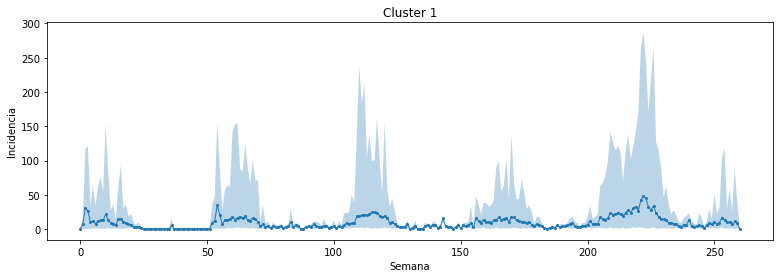

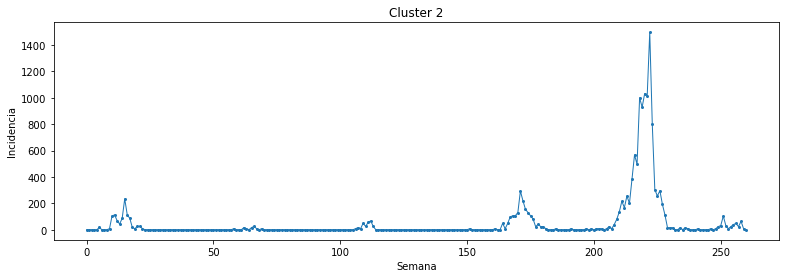

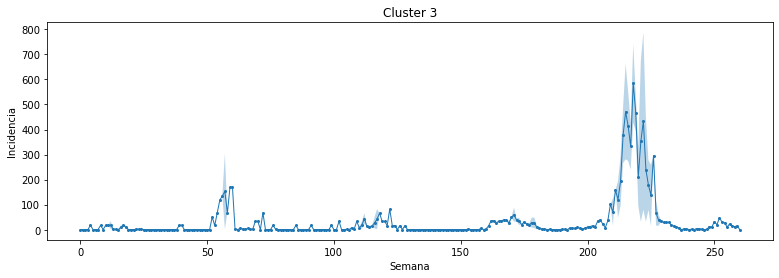

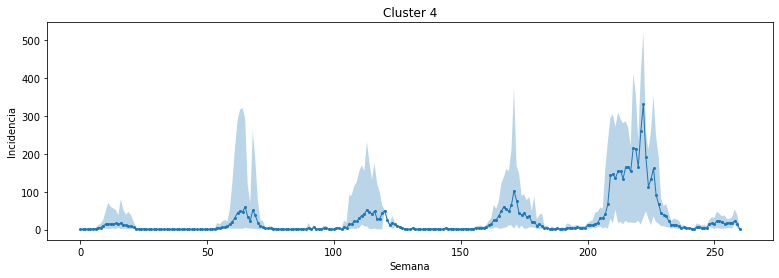

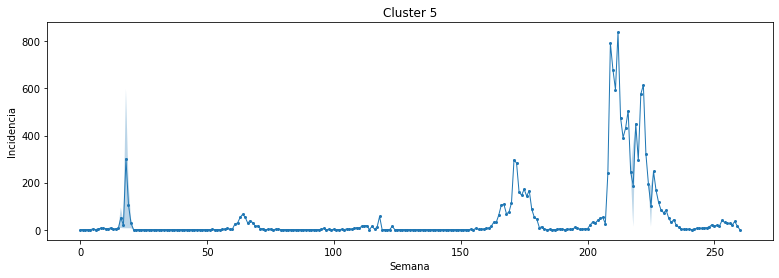

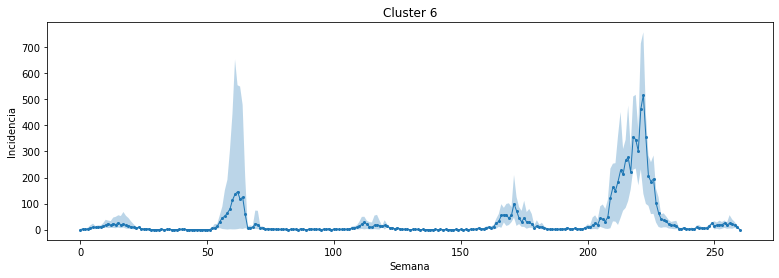

In [9]:
import random

for i in list(range(6)):
    aux = clustersFB[clustersFB['Cluster KM']== i].Distrito.values
    aux2 = df[df['Distrito'].isin(aux.tolist())]
    minimo= []
    maximo = []
    media = []
    for j in list(range(1,262)):
        aux3 = aux2[aux2['semana']==j].incidencia.values
        if (len(aux3)>0):
            minimo.append(min(aux3))
            maximo.append(max(aux3))
            media.append(sum(aux3)/len(aux3))
        else:
            minimo.append(-1)
            maximo.append(1)
            media.append(0.5)
    fig, ax = plt.subplots(figsize=(13, 4))
    #ax.plot(list(range(len(minimo))), minimo,'-')
    #ax.plot(list(range(len(maximo))), maximo,'-')
    ax.fill_between(list(range(len(minimo))), minimo, maximo, alpha=0.3)
    ax.plot(list(range(len(media))), media, lw=1, marker='o', ms=2)
    
    #ax.plot(fechas, media, lw=1, marker='o', ms=2)
    #ax.legend()
    plt.title('Cluster '+str(i+1))
    plt.xlabel('Semana')
    plt.ylabel('Incidencia')
    plt.savefig(my_path_py+"\\Pictures\\Promedio"+str(i)+"K6")
plt.show()

# INCIDENCIA UNA MUESTRA POR CLUSTER 12-13

In [10]:
for i in list(range(7)):
    aux = clustersFBP2[clustersFBP2['Cluster KM']== i].Distrito.values
    aux2 = df[df['Distrito'].isin(aux.tolist())]
    minimo= []
    maximo = []
    for j in list(range(1,265)):
        aux3 = aux2[aux2['semana']==j].incidencia.values
        if (len(aux3)>0):
            minimo.append(min(aux3))
            maximo.append(max(aux3))
        else:
            minimo.append(-1)
            maximo.append(1)
    fig, ax = plt.subplots(figsize=(13, 6))
    #ax.plot(list(range(len(minimo))), minimo,'-')
    #ax.plot(list(range(len(maximo))), maximo,'-')
    ax.fill_between(list(range(len(minimo))), minimo, maximo, alpha=0.3)
    for d in muestras_alta:
        if (clustersFBP2[clustersFBP2['Distrito']== d]['Cluster KM'].values[0] == i):
            aux = df[df['Distrito']== d]
            aux = pd.merge(semanas_df, aux, how="left", on=['semana'])
            #aux['incidencia'] = aux['incidencia'].replace(np.nan, 0)
            y = aux['semana'].values
            x = aux['incidencia'].values
            ax.plot(y, x, label = d, lw=1, marker='o', ms=2)
            ax.legend()
            
    for d in muestras_media:
        if (clustersFBP2[clustersFBP2['Distrito']== d]['Cluster KM'].values[0] == i):
            aux = df[df['Distrito']== d]
            aux = pd.merge(semanas_df, aux, how="left", on=['semana'])
            #aux['incidencia'] = aux['incidencia'].replace(np.nan, 0)
            y = aux['semana'].values
            x = aux['incidencia'].values
            ax.plot(y, x, label = d, lw=1, marker='o', ms=2)
            ax.legend()
            
    for d in muestras_baja:
        if (clustersFBP2[clustersFBP2['Distrito']== d]['Cluster KM'].values[0] == i):
            aux = df[df['Distrito']== d]
            aux = pd.merge(semanas_df, aux, how="left", on=['semana'])
            #aux['incidencia'] = aux['incidencia'].replace(np.nan, 0)
            y = aux['semana'].values
            x = aux['incidencia'].values
            ax.plot(y, x, label = d, lw=1, marker='o', ms=2)
            ax.legend()
plt.show()

NameError: name 'clustersFBP2' is not defined

In [ ]:
df_incidencianivel = pd.DataFrame()
lista_grupin = []
for d in listaDistrito:
    if incidencia_alta_lista.count(d)>0:
        lista_grupin.append(1)
    if incidencia_media_lista.count(d)> 0:
        lista_grupin.append(2)
    if incidencia_baja_lista.count(d)> 0:
        lista_grupin.append(3)
len(lista_grupin)

In [ ]:
grupos_incidencia1 = pd.DataFrame()
grupos_incidencia1['Distrito'] = listaDistrito
grupos_incidencia1['Grupo Incidencia'] = lista_grupin

In [ ]:
grupos_incidencia1.to_csv('Grupos_Incidencia.csv', index=False)